In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('C:/Users/Lenovo/Documents/zoppy/hackathon/churn-prediction/docs/dataset1.csv')

In [9]:
df.head()

,companyId,createdAt,deletedAt,plan,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,...,numCampains,receita_influ,receita_total,receita_giftback,receita_Campanha,receita_painelvendedor,receita_fluxo,ROI,DATADIF,CHURN
0,61f4046e-641d-4fd5-a7b2-d0781810da35,13/09/2024,NaN,avançado,110,1,0,8.0,1,0.0,...,10,6.617,1.563.709,0.000,180.000,0.0,6.437,0.0,NaN,0
1,97029824-22cf-4697-9b48-cd5af0b0a9ae,15/07/2024,13/08/2024,avançado,15,1,0,3.0,1,2.0,...,9,15.077,360.197,0.000,15.077,0.0,0.000,0.0,29.0,1
2,94dd4e81-a391-49f8-9672-e9f8cab561c8,17/09/2024,NaN,avançado,12,1,10,2.0,1,1.0,...,7,75.122,2.666.049,0.000,73.289,0.0,1.832,0.0,NaN,0
3,6647f613-24c5-4c26-8619-e65872f12943,06/03/2024,NaN,avançado,38,1,6,121.0,1,2.0,...,5,4.467,450.993,0.000,4.467,0.0,0.000,0.0,NaN,0
4,0cff4d04-4cee-47c3-ad53-ed8861806e26,20/08/2024,NaN,avançado,74,1,0,1.0,1,1.0,...,1,239.347,3.621.210,32.928,71.214,0.0,0.000,1.0,NaN,0


In [10]:
#Variavies Alvo CHURN
df_alvo = df['CHURN']

#Variaveis preditoras
df = df.drop(columns=['CHURN', 'companyId', 'plan','createdAt','deletedAt','DATADIF'])

In [11]:
df.head()

,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,ecommerceIntegration,daysWhatsAppApi,whatsAppApiIntegration,daysGiftback,...,daysFirstCampain,firstCampain,numCampains,receita_influ,receita_total,receita_giftback,receita_Campanha,receita_painelvendedor,receita_fluxo,ROI
0,110,1,0,8.0,1,0.0,1,8.0,1,NaN,...,8.0,1,10,6.617,1.563.709,0.000,180.000,0.0,6.437,0.0
1,15,1,0,3.0,1,2.0,1,4.0,1,NaN,...,11.0,1,9,15.077,360.197,0.000,15.077,0.0,0.000,0.0
2,12,1,10,2.0,1,1.0,1,2.0,1,NaN,...,3.0,1,7,75.122,2.666.049,0.000,73.289,0.0,1.832,0.0
3,38,1,6,121.0,1,2.0,1,8.0,1,21.0,...,22.0,1,5,4.467,450.993,0.000,4.467,0.0,0.000,0.0
4,74,1,0,1.0,1,1.0,1,3.0,1,16.0,...,21.0,1,1,239.347,3.621.210,32.928,71.214,0.0,0.000,1.0


In [12]:
df.describe()

,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,ecommerceIntegration,daysWhatsAppApi,whatsAppApiIntegration,daysGiftback,giftbackIntegration,daysFirstCampain,firstCampain,numCampains,receita_influ,receita_giftback,receita_Campanha,receita_painelvendedor,receita_fluxo,ROI
count,830.000000,830.000000,830.000000,627.000000,830.000000,710.000000,830.000000,556.000000,830.00000,569.000000,830.000000,433.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,396.000000
mean,37.942169,0.714458,1.920482,29.161085,0.755422,5.722535,0.855422,16.262590,0.66988,22.145870,0.685542,33.235566,0.521687,1.563855,72.756842,76.739422,26.264596,30.119473,16.359201,0.055556
std,52.818660,0.451945,5.937019,37.338208,0.430096,13.166094,0.351887,22.254695,0.47054,23.831528,0.464580,29.842487,0.499831,4.134079,190.845992,191.291772,113.518099,128.434915,97.684731,0.313323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,5.000000,0.00000,6.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1.000000,0.000000,9.000000,1.000000,2.000000,1.000000,9.000000,1.00000,15.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,48.000000,1.000000,6.000000,1.000000,17.000000,1.00000,29.000000,1.000000,43.000000,1.000000,1.000000,6.641000,2.239250,0.000000,0.000000,0.000000,0.000000
max,958.000000,1.000000,30.000000,202.000000,1.000000,151.000000,1.000000,189.000000,1.00000,168.000000,1.000000,156.000000,1.000000,35.000000,976.000000,965.000000,983.000000,976.000000,963.000000,3.000000


In [13]:
# Substiuindo valores nulos por -1
df.fillna(-1, inplace=True)

In [14]:
df.describe()

,numLogin,csm,numTickets,daysEmail,emailIntegration,daysEcommerce,ecommerceIntegration,daysWhatsAppApi,whatsAppApiIntegration,daysGiftback,giftbackIntegration,daysFirstCampain,firstCampain,numCampains,receita_influ,receita_giftback,receita_Campanha,receita_painelvendedor,receita_fluxo,ROI
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,37.942169,0.714458,1.920482,21.784337,0.755422,4.750602,0.855422,10.563855,0.66988,14.867470,0.685542,16.860241,0.521687,1.563855,72.756842,76.739422,26.264596,30.119473,16.359201,-0.496386
std,52.818660,0.451945,5.937019,34.943249,0.430096,12.403615,0.351887,19.938752,0.47054,22.466902,0.464580,27.511940,0.499831,4.134079,190.845992,191.291772,113.518099,128.434915,97.684731,0.570156
min,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.00000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.00000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,24.000000,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,5.000000,1.00000,6.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,51.000000,1.000000,0.000000,26.750000,1.000000,5.000000,1.000000,13.000000,1.00000,21.750000,1.000000,25.000000,1.000000,1.000000,6.641000,2.239250,0.000000,0.000000,0.000000,0.000000
max,958.000000,1.000000,30.000000,202.000000,1.000000,151.000000,1.000000,189.000000,1.00000,168.000000,1.000000,156.000000,1.000000,35.000000,976.000000,965.000000,983.000000,976.000000,963.000000,3.000000


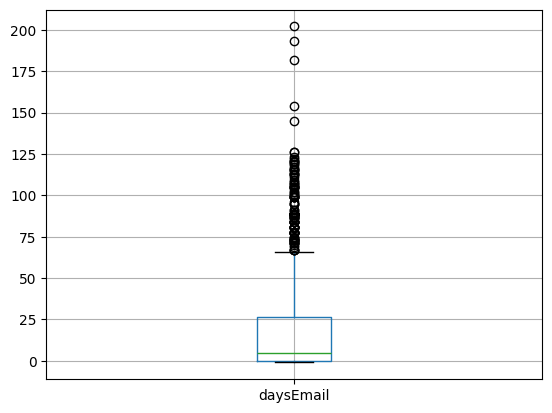

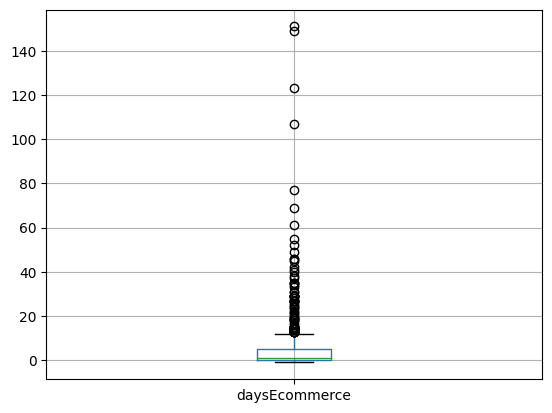

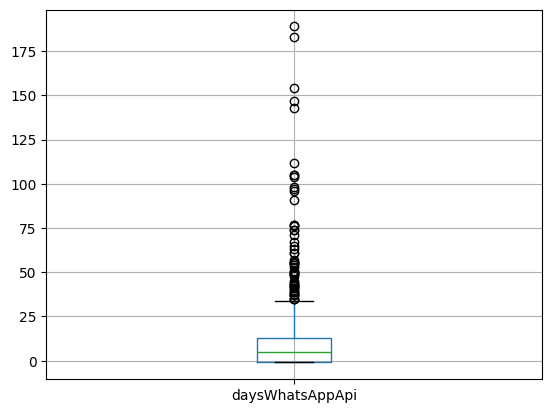

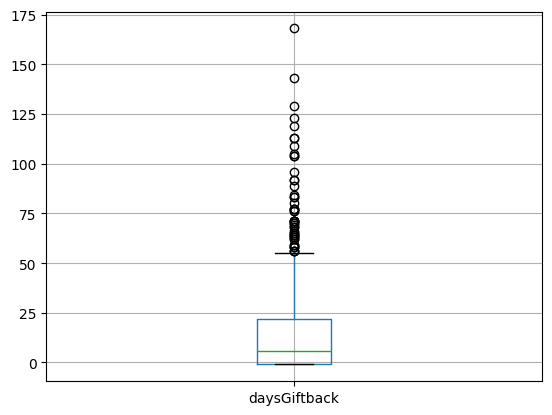

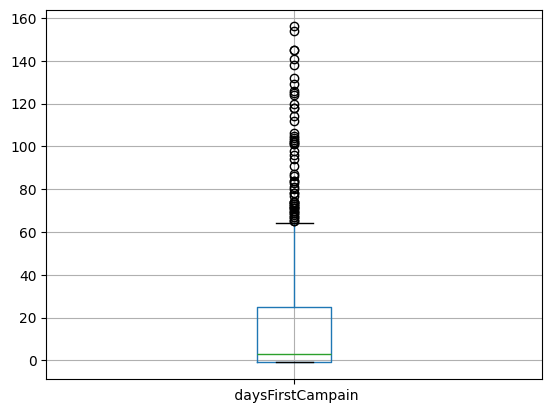

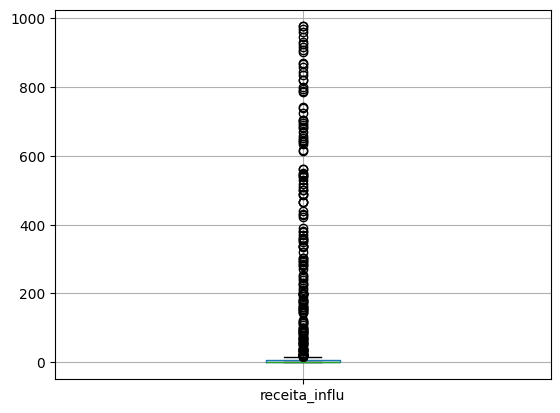

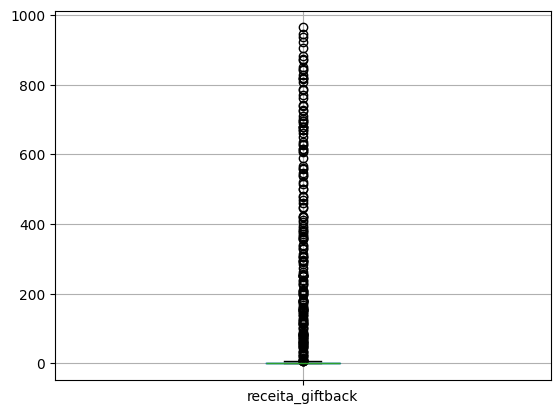

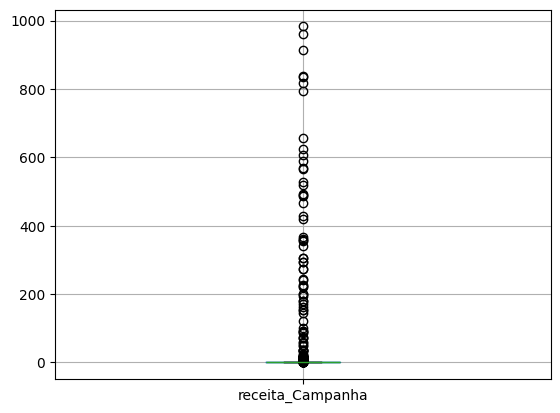

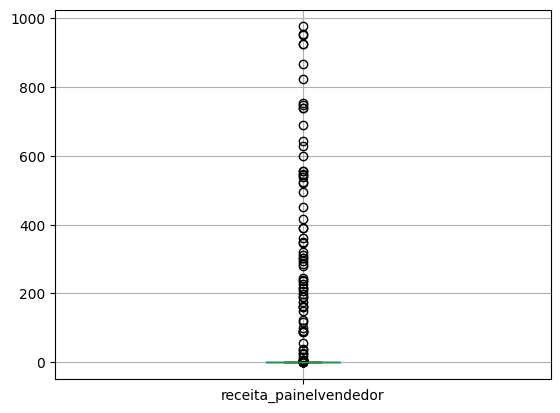

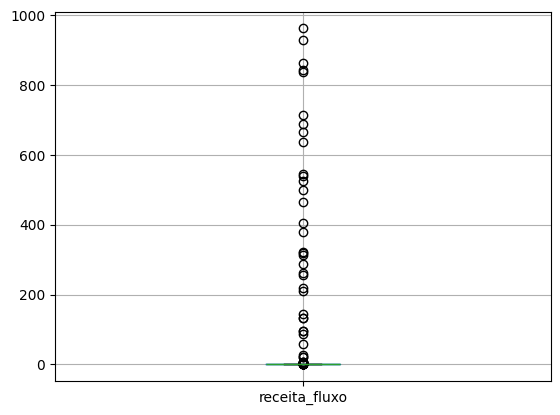

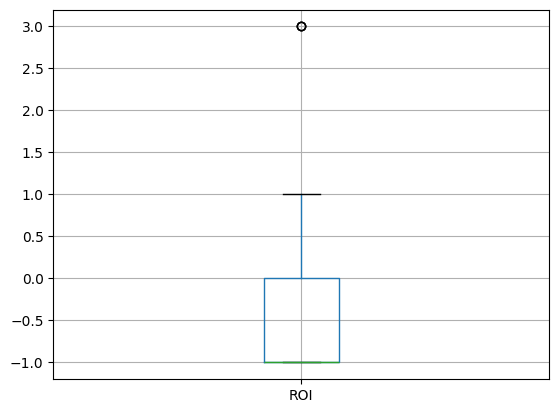

In [15]:
#Boxplot para cada variável numérica

for i in df.columns:
    if df[i].dtype == 'float64':
        df.boxplot(column=i)
        plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para remover outliers de forma iterativa usando o IQR
def remover_outliers_iterativo(df, coluna, multiplicador=1.5):
    df_sem_outliers = df.copy()  # Criar uma cópia do DataFrame original
    while True:
        # Cálculo do IQR (Interquartile Range)
        Q1 = df_sem_outliers[coluna].quantile(0.25)
        Q3 = df_sem_outliers[coluna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir os limites de detecção de outliers
        limite_inferior = Q1 - multiplicador * IQR
        limite_superior = Q3 + multiplicador * IQR

        # Filtrar os dados sem outliers
        filtro = (df_sem_outliers[coluna] >= limite_inferior) & (df_sem_outliers[coluna] <= limite_superior)

        # Se todos os dados estiverem dentro dos limites, interromper o loop
        if filtro.all():
            break

        # Atualizar o DataFrame com os dados sem outliers
        df_sem_outliers = df_sem_outliers[filtro]
    
    return df_sem_outliers


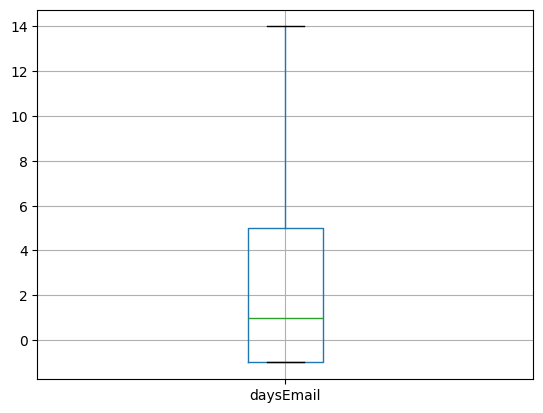

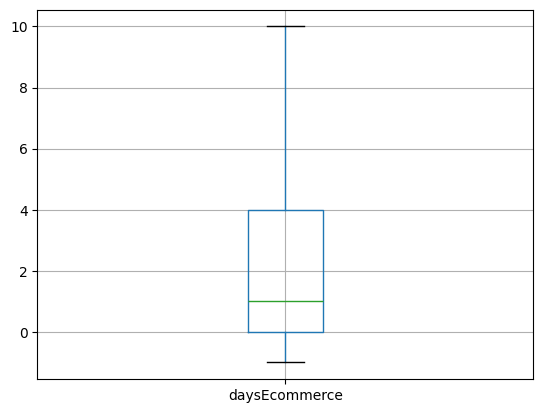

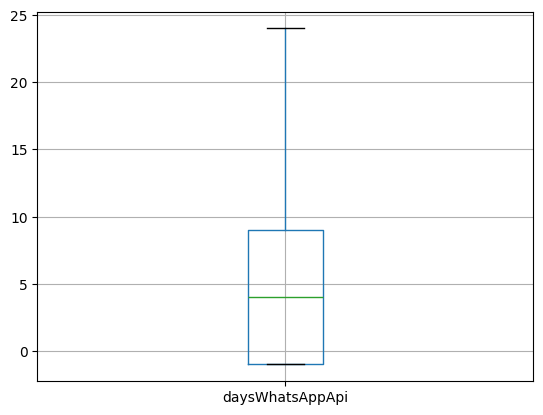

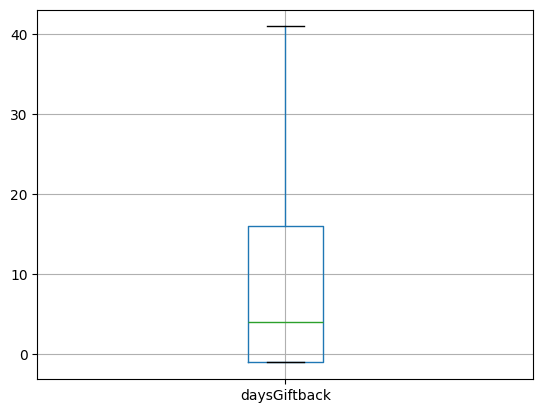

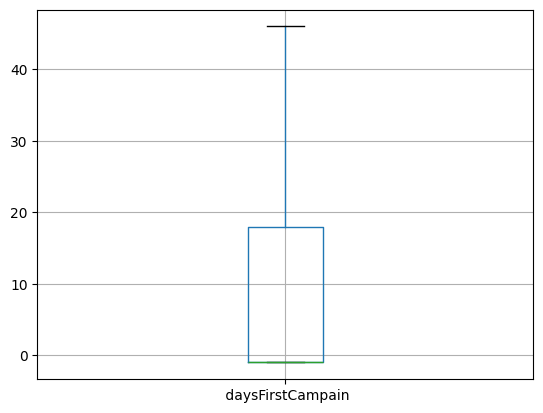

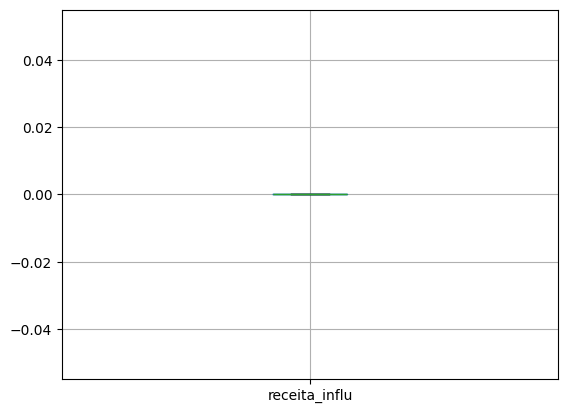

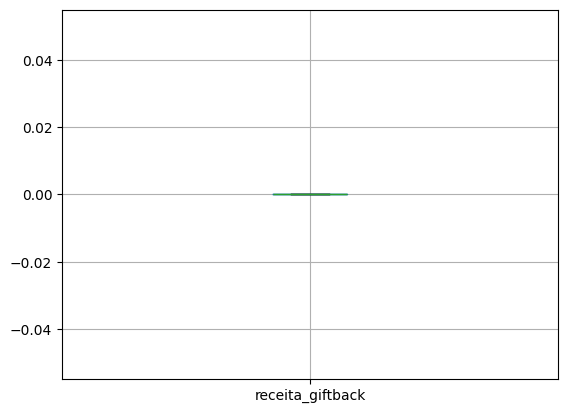

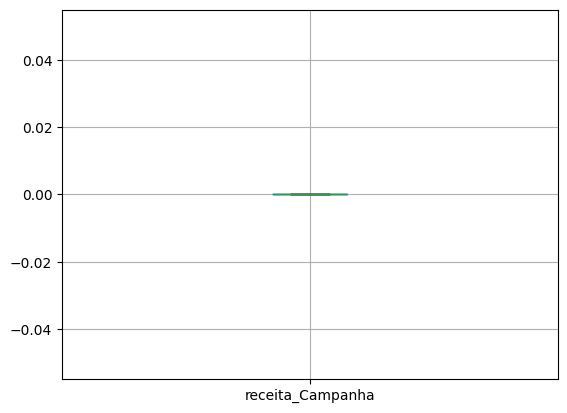

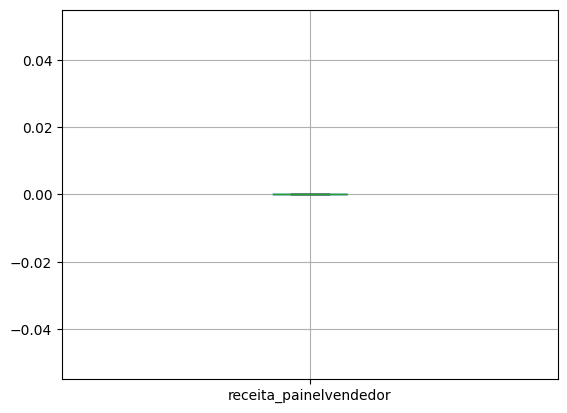

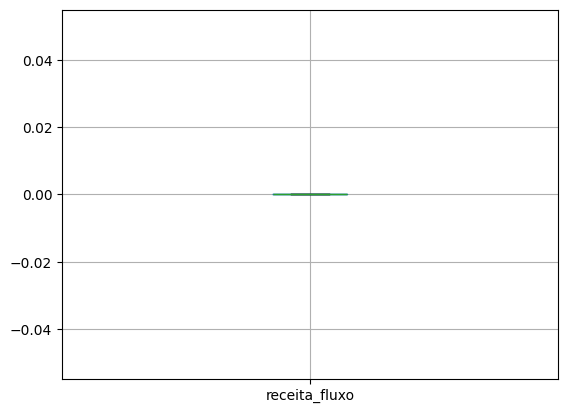

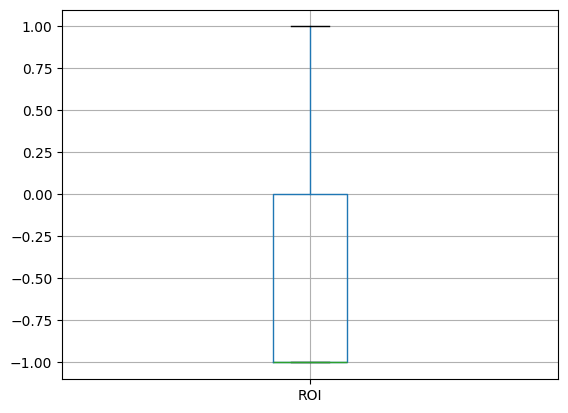

In [17]:
# faca o codigo para fazer o boxplot de cada variavel numerica apos o tratamento de ouliers
for i in df.columns:
    if df[i].dtype == 'float64':
        df_sem_outliers = remover_outliers_iterativo(df, i)
        df_sem_outliers.boxplot(column=i)
        plt.show()

In [18]:
# FAça uma analise de quantos dados foram retirados pela analise de outliers comparando com a base inicial
print('Quantidade de dados na base original:', df.shape[0])
print('Quantidade de dados na base sem outliers:', df_sem_outliers.shape[0])
print('Quantidade de dados removidos:', df.shape[0] - df_sem_outliers.shape[0])


Quantidade de dados na base original: 830
Quantidade de dados na base sem outliers: 827
Quantidade de dados removidos: 3


In [19]:
import numpy as np

In [20]:
x = df_sem_outliers
y = df_alvo

In [21]:
churn_indices = y[y == 1].index
non_churn_indices = y[y == 0].index

In [22]:
non_churn_sample = np.random.choice(non_churn_indices, size=len(churn_indices), replace=False)
undersample_indices = np.concatenate([churn_indices, non_churn_sample])

In [ ]:
# Redefinir os índices de X e y
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

# Agora você pode usar os índices de subamostragem
X_bal = X.loc[undersample_indices]
y_bal = y.loc[undersample_indices]

In [26]:
#FAÇA a analise de correlação entre as variaveis preditoras e a variavel alvo
correlacao = df_sem_outliers.corrwith(df_alvo)
correlacao = correlacao.sort_values(ascending=False)
print(correlacao)

# Faça uma matriz de correlação
correlacao = df_sem_outliers.corr()
plt.matshow(correlacao)
plt.show()


ValueError: could not convert string to float: '1.563.709'

In [ ]:
#separar base de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.5, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar a cross-validation


# Exibir os resultados
print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())

In [ ]:
#treinar um modelo de regressão logistica
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()

regressao_logistica.fit(X_train, y_train)

In [ ]:
#treinar com o modelo random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)


In [ ]:
#gradiente boosting
from sklearn.ensemble import GradientBoostingClassifier

gradiente_boosting = GradientBoostingClassifier()

gradiente_boosting.fit(X_train, y_train)

In [ ]:
#avaliar o modelo

from sklearn.metrics import classification_report

y_pred = regressao_logistica.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = gradiente_boosting.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# Acuracy Random Forest 
from sklearn.metrics import accuracy_score

y_pred = random_forest.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia Random Forest:", acuracia)


In [ ]:
#agora quero avaliar a importancia de cada variavel preditora
importancia = random_forest.feature_importances_
importancia = pd.Series(importancia, index=X.columns)
importancia = importancia.sort_values(ascending=False)
print(importancia)